We will download the Mnist dataset from 'https://github.com/fgnt/mnist'. We edit the function to save our images and labels into a single HDF5 file which allows for efficient access of our images and labels.

In [1]:
# let's download the dataset into HDF5 files
def download_mnist(save_path='mnist_data.h5'):
    # The code to download the mnist data original came from
    # https://cntk.ai/pythondocs/CNTK_103A_MNIST_DataLoader.html
    import gzip
    import numpy as np
    import os
    import struct
    import h5py
    from urllib.request import urlretrieve

    def load_data(src, num_samples):
        print("Downloading " + src)
        gzfname, h = urlretrieve(src, "./delete.me")
        print("Done.")
        try:
            with gzip.open(gzfname) as gz:
                n = struct.unpack("I", gz.read(4))
                if n[0] != 0x3080000:
                    raise Exception("Invalid file: unexpected magic number.")
                n = struct.unpack(">I", gz.read(4))[0]
                if n != num_samples:
                    raise Exception("Invalid file: expected {0} entries.".format(num_samples))
                crow = struct.unpack(">I", gz.read(4))[0]
                ccol = struct.unpack(">I", gz.read(4))[0]
                if crow != 28 or ccol != 28:
                    raise Exception("Invalid file: expected 28 rows/cols per image.")
                res = np.frombuffer(gz.read(num_samples * crow * ccol), dtype=np.uint8)
        finally:
            os.remove(gzfname)
        return res.reshape((num_samples, crow, ccol)) / 256

    def load_labels(src, num_samples):
        print("Downloading " + src)
        gzfname, h = urlretrieve(src, "./delete.me")
        print("Done.")
        try:
            with gzip.open(gzfname) as gz:
                n = struct.unpack("I", gz.read(4))
                if n[0] != 0x1080000:
                    raise Exception("Invalid file: unexpected magic number.")
                n = struct.unpack(">I", gz.read(4))
                if n[0] != num_samples:
                    raise Exception("Invalid file: expected {0} rows.".format(num_samples))
                res = np.frombuffer(gz.read(num_samples), dtype=np.uint8)
        finally:
            os.remove(gzfname)
        return res.reshape((num_samples))

    def try_download(data_source, label_source, num_samples):
        data = load_data(data_source, num_samples)
        labels = load_labels(label_source, num_samples)
        return data, labels

    # Specify the server for downloading
    server = 'https://raw.githubusercontent.com/fgnt/mnist/master'
    
    # URLs for the train image and label data
    url_train_image = f'{server}/train-images-idx3-ubyte.gz'
    url_train_labels = f'{server}/train-labels-idx1-ubyte.gz'
    num_train_samples = 60000

    print("Downloading train data")
    train_features, train_labels = try_download(url_train_image, url_train_labels, num_train_samples)

    # URLs for the test image and label data
    url_test_image = f'{server}/t10k-images-idx3-ubyte.gz'
    url_test_labels = f'{server}/t10k-labels-idx1-ubyte.gz'
    num_test_samples = 10000

    print("Downloading test data")
    test_features, test_labels = try_download(url_test_image, url_test_labels, num_test_samples)

    # Save the data to an HDF5 file
    with h5py.File(save_path, 'w') as h5f:
        h5f.create_dataset('train_images', data=train_features)
        h5f.create_dataset('train_labels', data=train_labels)
        h5f.create_dataset('test_images', data=test_features)
        h5f.create_dataset('test_labels', data=test_labels)

    print(f"Data saved to {save_path}")


In [2]:
download_mnist()

Done.
Done.
Done.
Done.
Data saved to mnist_data.h5


5


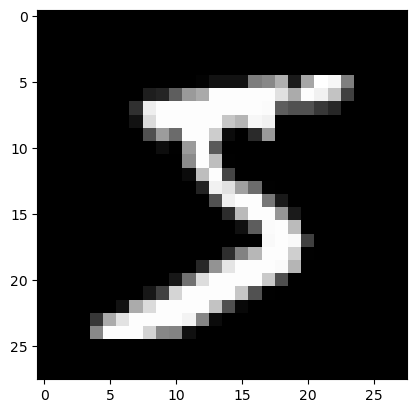

(1, 28, 28)


In [6]:
# visualize data from HDF5
import h5py
import matplotlib.pyplot as plt
import numpy as np

idx = 0
f = h5py.File('mnist_data.h5', 'r')
image = f['train_images'][idx]
print(f['train_labels'][idx])

plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.show()